In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Admission_Predict.csv')
print(df.columns)
df.describe()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
df = df.rename(columns={"GRE Score" : "GRE_Score", "TOEFL Score" : "TOEFL_Score", "University Rating" : "University_Rating", "Chance of Admit" : "Admission"})

df.head()


,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
from sklearn.preprocessing import StandardScaler
features = ['GRE_Score','TOEFL_Score', 'SOP', 'LOR', 'CGPA', 'Research', 'University_Rating']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,[ 'Admission',]].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data=x, columns = features).head()

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Research,University_Rating
0,1.762107,1.746971,1.093864,1.167321,1.764818,0.909112,0.798829
1,0.627656,-0.067635,0.596653,1.167321,0.455151,0.909112,0.798829
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631,0.909112,-0.076600
3,0.453126,0.427257,0.099442,-1.061454,0.119339,0.909112,-0.076600
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029,-1.099975,-0.952029


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-3.543521,-0.324142
1,-1.631253,0.078057
2,0.570107,-0.681066
3,-0.296114,-1.303278
4,2.061638,0.036091


In [9]:
finalDf = pd.concat([principalDf, df[[ 'Admission']]], axis = 1)
finalDf.head(15)

,principal component 1,principal component 2,Admission
0,-3.543521,-0.324142,0.92
1,-1.631253,0.078057,0.76
2,0.570107,-0.681066,0.72
3,-0.296114,-1.303278,0.80
4,2.061638,0.036091,0.65
5,-2.629971,-0.626862,0.90
6,-0.271167,-0.664473,0.75
7,1.842276,1.087343,0.68
8,3.626130,-0.588168,0.50
9,0.237026,0.419498,0.45


In [10]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())


[0.69614538 0.10355405]
0.7996994308863018


In [11]:
pca.components_


array([[-0.39824537, -0.3988544 , -0.38218308, -0.35597675, -0.41742637,
        -0.29146866, -0.38772889],
       [-0.28739503, -0.12309599,  0.35045293,  0.44949846, -0.02064827,
        -0.72388997,  0.23009197]])

In [12]:
pca_all = PCA()
pca_all.fit(x)
W = pca_all.components_ 
W

array([[-0.39824537, -0.3988544 , -0.38218308, -0.35597675, -0.41742637,
        -0.29146866, -0.38772889],
       [-0.28739503, -0.12309599,  0.35045293,  0.44949846, -0.02064827,
        -0.72388997,  0.23009197],
       [-0.35530062, -0.4545317 ,  0.25685064,  0.4133604 , -0.24518698,
         0.60841215,  0.00642864],
       [-0.20387046, -0.08276064,  0.21429656, -0.59221978, -0.1407423 ,
         0.0665897 ,  0.72848997],
       [-0.05917087,  0.16868493,  0.76762454, -0.3439887 , -0.03581868,
        -0.00794558, -0.5090407 ],
       [ 0.27520046, -0.72989284,  0.09887396, -0.1681339 ,  0.58758386,
        -0.07474973, -0.05132022],
       [ 0.7153786 , -0.22608848,  0.14212695,  0.05516664, -0.63155843,
        -0.10382268,  0.0650295 ]])

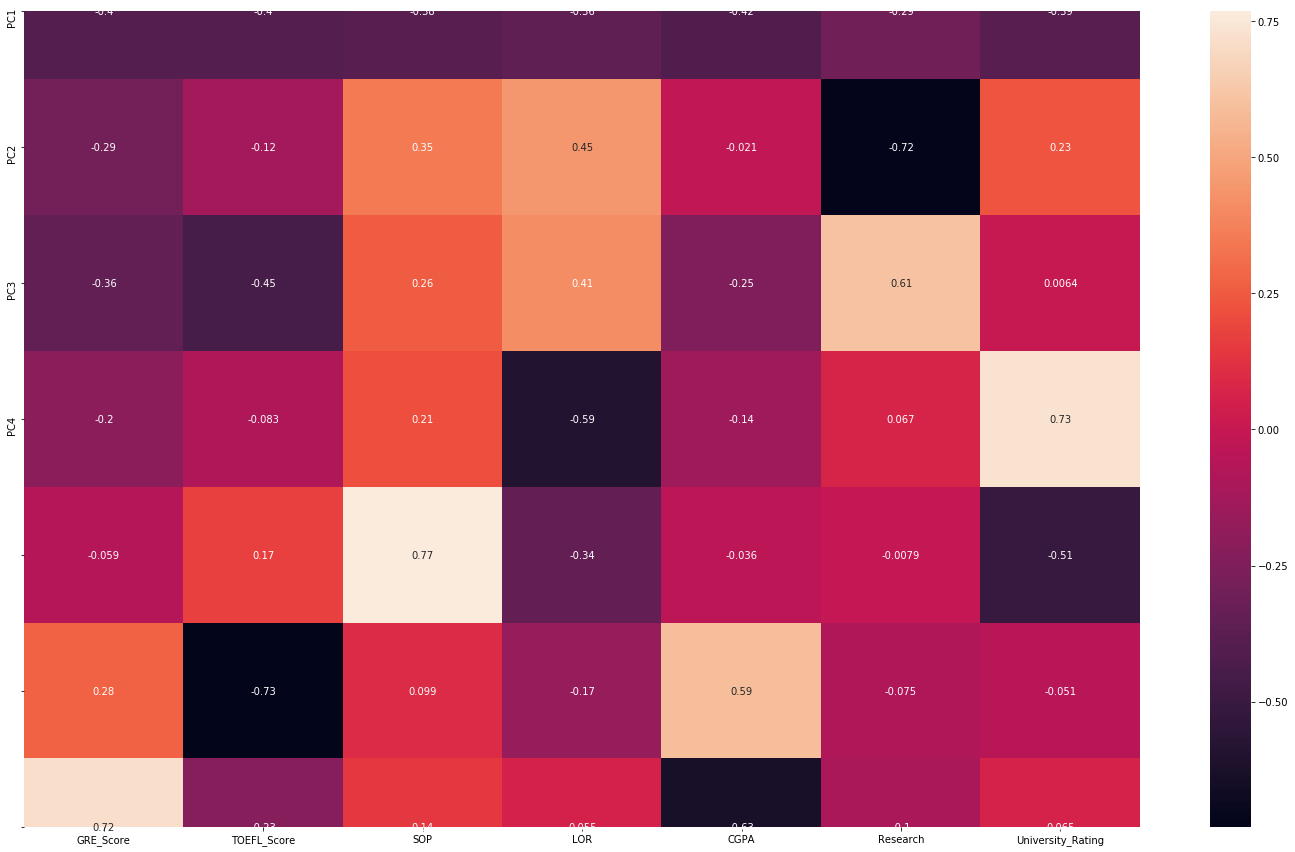

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(W, annot=True, ax=ax)
ax.set_yticklabels(['PC1', 'PC2', 'PC3', 'PC4'])
ax.set_xticklabels(features)
plt.show()

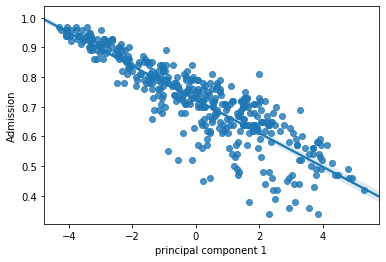

In [16]:
import seaborn as sns
sns.regplot(x= 'principal component 1', y = 'Admission', data = finalDf)
plt.show()

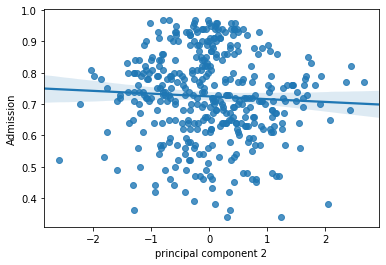

In [18]:
import seaborn as sns2
sns2.regplot(x= 'principal component 2', y = 'Admission', data = finalDf)
plt.show()